In [1]:
# !git clone https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective.git
# !mv Python_Benchmark_Test_Optimization_Function_Single_Objective/src .
# !mv Python_Benchmark_Test_Optimization_Function_Single_Objective/pybenchfunction/ .
# !ls Python_Benchmark_Test_Optimization_Function_Single_Objective/

In [1]:
import torch
from tqdm.notebook import tqdm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pybenchfunction as bench

# get all the available functions accepting ANY dimension
any_dim_functions = bench.get_functions(None)
# get all the available continuous and non-convex functions accepting 2D
continous_nonconvex_2d_functions = bench.get_functions(
    2,  # dimension
    continuous=True,
    convex=False,
    separable=None,
    differentiable=True,  # let's use only differentiable functions?
    mutimodal=None,
    randomized_term=None
)
print(len(any_dim_functions))  # --> 40
print(len(continous_nonconvex_2d_functions))  # --> 41, now 38 if differentiable

# Import specific function
# set the dimension of the input for the function
sphere = bench.function.Sphere(3)
# get results
X = np.array([1, 3, 0])
print(sphere(X))  # --> 10


40
38
10


# LevyN13

In [3]:
import torch

d = 20
def computeValue(i,x):
    w = 1+(x-1)/4
    if i==0:
        return  torch.sin(torch.pi*w[0])**2
    else:
        return  ( (w[i-1]-1)**2*(1+10*torch.sin(torch.pi*w[i-1]+1)**2)+ (w[-1]-1)**2*(1+torch.sin(2*torch.pi*w[-1])**2)         )
    

In [4]:
#         H = np.zeros([d,d])
#         for i in range(d):
#             Hi = torch.autograd.grad(g[i],x,retain_graph=True)[0]
#             H[:,i]=Hi
#         H = 0.5*(H+H.T)


  0%|          | 0/1000 [00:00<?, ?it/s]

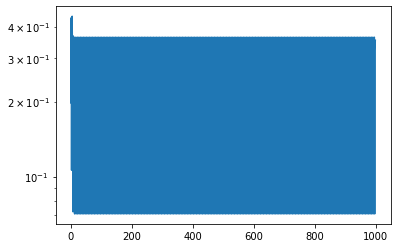

In [5]:
torch.manual_seed(0)
x = torch.randn(d, requires_grad=True).double()*1
np.random.seed(0)

idx = list(range(d))
fval=[]
for ep in tqdm(range(1000)):
    np.random.shuffle(idx)
    
    for i in idx:
        
        v = computeValue(i,x)
        g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
        with torch.no_grad():
            if torch.norm(g)**2 > 1e-10:
                x.sub_(v*g/torch.norm(g)**2)  #ROB: This is polyak stepsize x = x - fi/g^2 g? What about the second step of SP2?
            
        v = computeValue(i,x)
        g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
        with torch.no_grad():
#             if torch.norm(g)**2 > 1e-10:
#                 x.sub_(0.1*v*g/torch.norm(g)**2)

            x[x>2]=2
            x[x<-2]=-2
         
    fval.append(np.mean([computeValue(i,x).item() for i in range(d)]))

plt.semilogy(fval)

    

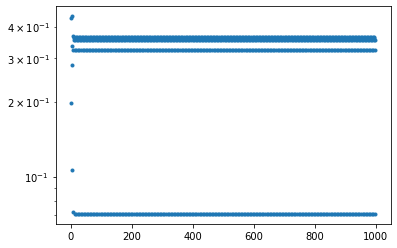

In [6]:
plt.semilogy(fval,'.')

In [7]:
x

tensor([ 1.0000, -0.9760,  1.0000,  1.0000,  1.0000, -2.0000,  1.0000,  1.0000,
         1.0000, -0.3508,  0.0658,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [8]:
##ROB: Why is this cell repeated?

import numpy as np
import matplotlib.pyplot as plt
import pybenchfunction as bench

# get all the available functions accepting ANY dimension
any_dim_functions = bench.get_functions(None)
# get all the available continuous and non-convex functions accepting 2D
continous_nonconvex_2d_functions = bench.get_functions(
    2,  # dimension
    continuous=True,
    convex=False,
    separable=None,
    differentiable=None,
    mutimodal=None,
    randomized_term=None
)
print(len(any_dim_functions))  # --> 40
print(len(continous_nonconvex_2d_functions))  # --> 41


# Import specific function
# set the dimension of the input for the function
sphere = bench.function.LevyN13(3)
# get results
X = np.array([1, 0])
print(sphere(X))  # --> 10

40
41
1.0


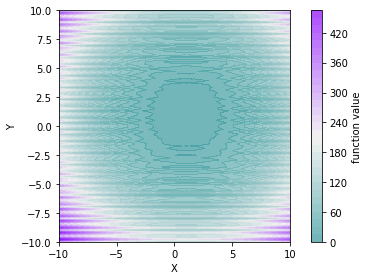

In [9]:
thevenot = bench.function.LevyN13(20)
bench.plot_2d(thevenot, n_space=100, ax=None,show=False)
plt.tight_layout()
# plt.savefig("./figures/sample_2D.eps")

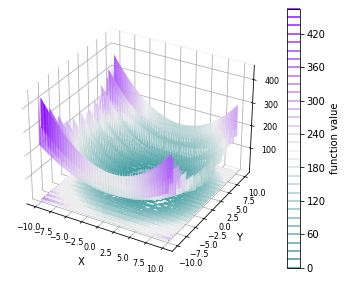

In [10]:
# bench.plot_3d(thevenot, n_space=100, ax=None,show=False)
bench.plot_3d(thevenot, n_space=100, ax=None,show=False)
plt.tight_layout()
# plt.savefig("./figures/sample_3D.eps")


In [12]:
# Plot 2d or plot 3d contours
# Warning ! Only working on 2d functions objects !
# Warning 2! change n_space to reduce the computing time


# access/change the parameters of parametrics functions :
print(thevenot.get_param())  # --> {'m': 5, 'beta': 15}
thevenot.beta = 42
print(thevenot.get_param())  # --> {'m': 5, 'beta': 42}


# get the global minimum for a specific dimension
# it only gives the global minimum for defaut parameters
X_min, minimum = sphere.get_global_minimum(3)
print(X_min)  # --> [0 0 0]
print(minimum)  # --> 0



{}
{}
[1 1]
1.3497838043956716e-31


# PERM

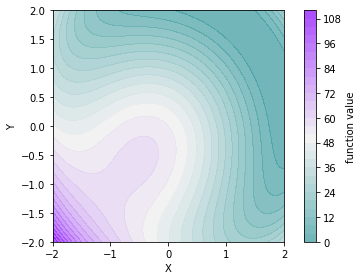

In [13]:
d=2
thevenot = bench.function.PermDBeta(d)
bench.plot_2d(thevenot, n_space=100, ax=None,show=False)
plt.tight_layout()
# plt.savefig("./figures/sample_2D.eps")

In [14]:
def computeValue(i,x):
    
    v = 0
    for j in range(d):
        v+=(1+j+beta)*(x[j]**(i+1) -1. / (j+1)**(i+1))
        print(v)
        
    return v
    
computeValue(0,x)+computeValue(1,x), x

NameError: name 'beta' is not defined

  0%|          | 0/1000 [00:00<?, ?it/s]

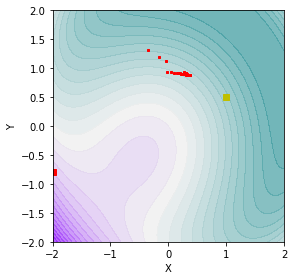

(tensor(-4.4409e-16, dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor(2.2204e-16, dtype=torch.float64, grad_fn=<AddBackward0>))

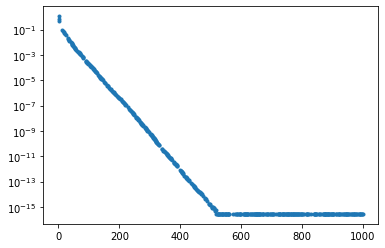

In [ ]:

beta = 0.5

torch.manual_seed(0)
x = torch.zeros(d, requires_grad=True).double()*1

np.random.seed(0)

def computeValue(i,x):
    
    v = 0
    for j in range(d):
        v+=(1+j+beta)*(x[j]**(i+1) -1. / (j+1)**(i+1))
       
    return v 
    
computeValue(0,x),computeValue(1,x)


torch.manual_seed(1)
x = -torch.randn(d, requires_grad=True).double()*3

np.random.seed(0)

thevenot = bench.function.PermDBeta(d)
bench.plot_2d(thevenot, n_space=100, ax=None,show=False)
# bench.plot_3d(thevenot, n_space=100, ax=None,show=False)
# plt.tight_layout()

X_min, minimum = thevenot.get_global_minimum(2)


plt.plot(X_min[0],X_min[1],'ys')

idx = list(range(d))
fval=[]
fval.append(np.mean([computeValue(i,x).item() for i in range(d)]))
        
plt.plot(x[0].item(),x[1].item(),'rs')
 
for ep in tqdm(range(1000)):
    np.random.shuffle(idx)
    
    for i in idx:
        
        v = computeValue(i,x)
        g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
        with torch.no_grad():
            if torch.norm(g)**2 > 1e-10:
                x.sub_(v*g/torch.norm(g)**2)
            
#         v = computeValue(i,x)
#         g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
#         with torch.no_grad():
#             if torch.norm(g)**2 > 1e-10:
#                 x.sub_(0.1*v*g/torch.norm(g)**2)

#             x[x>d]=d
#             x[x<-d]=-d

    fval.append(np.mean([computeValue(i,x).item() for i in range(d)]))
        
    plt.plot(x[0].item(),x[1].item(),'rs',markersize=2)
         
plt.tight_layout()

plt.show()
plt.semilogy(fval,'.')

    
 

computeValue(0,x),computeValue(1,x)

In [ ]:
x

tensor([0.3750, 0.8750], dtype=torch.float64, grad_fn=<MulBackward0>)

# RASTRIGIN FUNCTION

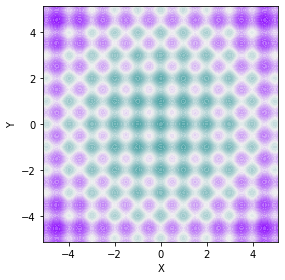

In [ ]:
d=2
thevenot = bench.function.Rastrigin(d)
bench.plot_2d(thevenot, n_space=100, ax=None,show=False)
plt.tight_layout()
# plt.savefig("./figures/sample_2D.eps")

  0%|          | 0/300 [00:00<?, ?it/s]

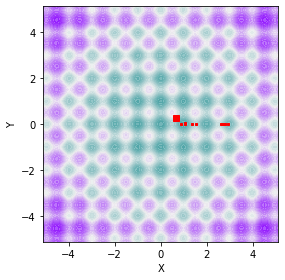

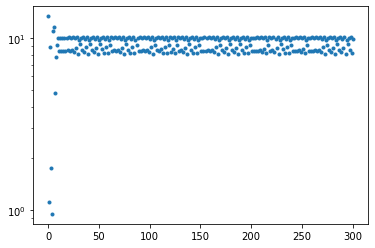

In [ ]:

beta = 0.5

torch.manual_seed(0)
x = torch.zeros(d, requires_grad=True)*1

np.random.seed(0)


def computeValue(i,x):
    
    v = 10+x[i]**2-10*torch.cos(2*torch.pi*x[i])

    return v
    
computeValue(0,x),computeValue(1,x)


torch.manual_seed(1)
x = torch.randn(d, requires_grad=True)

np.random.seed(0)

bench.plot_2d(thevenot, n_space=100, ax=None,show=False)

# bench.plot_3d(thevenot, n_space=100, ax=None,show=False)
# plt.tight_layout()
plt.tight_layout()


idx = list(range(d))
fval=[]
fval.append(np.mean([computeValue(i,x).item() for i in range(d)]))
        
plt.plot(x[0].item(),x[1].item(),'rs')
 
for ep in tqdm(range(300)):
    np.random.shuffle(idx)
    
    for i in idx:
        
        v = computeValue(i,x)
        g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
        with torch.no_grad():
            if torch.norm(g)**2 > 1e-10:
                x.sub_(v*g/torch.norm(g)**2)
            
        v = computeValue(i,x)
        g = torch.autograd.grad(v,x,create_graph=True,retain_graph=True)[0]
        
        with torch.no_grad():
            if torch.norm(g)**2 > 1e-10:
                x.sub_(v*g/torch.norm(g)**2)

#             x[x>d]=d
#             x[x<-d]=-d

    fval.append(np.mean([computeValue(i,x).item() for i in range(d)]))
        
    plt.plot(x[0].item(),x[1].item(),'rs',markersize=2)
         

plt.show()
plt.semilogy(fval,'.')

    




In [ ]:
x

tensor([2.7102e+00, 1.8169e-05], requires_grad=True)

In [ ]:

# access the latex formulas. You can also convert it into images
# latex = bench.function.Thevenot.latex_formula
# latex = bench.function.Thevenot.latex_formula_dimension
# latex = bench.function.Thevenot.latex_formula_input_domain
# latex = bench.function.Thevenot.latex_formula_global_minimum
# print(latex)  # --> f(\mathbf{x}) = exp(-\sum_{i=1}^{d}(x_i / \beta)^{2m}) - 2exp(-\prod_{i=1}^{d}x_i^2) \prod_{i=1}^{d}cos^ 2(x_i)
# latex_img = bench.latex_img(latex)
# convert the latex formula to image
# plt.imshow(latex_img)
# plt.show()